<a href="https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic4/4.1_open_source_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Engineering Essentials by Nebius Academy

Course github: [link](https://github.com/Nebius-Academy/LLM-Engineering-Essentials/tree/main)

The course is in development now, with more materials coming soon.

# 4.1. Open Source Models and the Hugging Face ecosystem

In topics 1-3 we worked with LLM API's, but in some cases you might choose against it:

* If your LLM queries are abundant and your AI team is capable of optimizing LLM inference, using a **self-hosted LLM** might be more financially efficient.
* If you work with private data and can't risk sharing it with third-party API providers, you may have no choice other than hosting an LLM on your own servers or in your safe cloud.
* Though many LLM APIs also provide fine tuning, you might want to keep your models and your training data and closely overview the training.

So, the time has come to learn how to deploy models on your own!

In this notebook, we'll learn how to load LLMs from **Hugging Face** and work with them using the **transformers** library.

Before starting, please check that you have a GPU available. L40s or L4 in colab will be more than enough.

# Hugging Face ecosystem

[Hugging Face](https://huggingface.co/) is the default platform where open source model creators share their LLMs. It is also a great hub for learning and collaboration. It also provides the **transformers** library which is the core tool for working with transformer models and with LLMs in particular.

If you need to use an LLM, say, a small **Llama-3.2-3B**, just search for it in Hugging Face:

<center>
<img src="https://drive.google.com/uc?export=view&id=1LRRmvUj_esn6_rsqhAJNZc5icxMqhq9i" width=800 />
</center>

Among the search results, you'll find a number of fine tunes, or quantized versions - make sure that you choose one of the actual Meta's models - they have a `meta-llama` prefix. We'll work with [**meta-llama/Llama-3.2-3B-Instruct**](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct).

**Note**. To use Meta's models, you need to agree with its licence agreement, and in some cases, to get an approval. For that, you'll need to:

* Register to [Hugging Face](https://huggingface.co/), go to the [access token page](https://huggingface.co/settings/tokens) and get a token.
* Save this token to a file `hf_access_token` (with no extension) and load it to colab.
* Go to [Llama-3.2-3B-Instruct model card page](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct) and agree to ~sell your soul to Meta~ the license agreement.

If you don't like this or if you fail to get access, you can use [**Qwen2.5-3B-Instruct**](https://huggingface.co/Qwen/Qwen2.5-3B-Instruct) without such a hassle.

If you succeeded with getting access to Llama 3.2, run the following cell:

In this notebook, we'll be using the **Llama-3.2-3B** model. To load it, you'll need to

1. Log in to Hugging Face, go to the [model's page](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct) and ~sell your soul to Meta~ accept its licence agreement (if haven't done it yet). If you don't want to accept the agreement or if you can't do it for some reason, you can use [**Qwen2.5-7B-Instruct**](https://huggingface.co/Qwen/Qwen2.5-7B-Instruct). Just change the `MODEL_NAME` parameter values then.

2. Allow Hugging Face to understand that you're using this model. For that, you'll need to generate a [Hugging Face access token](https://huggingface.co/settings/tokens). (Just save it somewhere; they won't show it to you again.)

  Now, there are two ways of delivering the token to a Jupyter notebook:

  - By uploading your HF access token as a file, reading it into a `hf_access_token` variable.
  - By using **colab secrets**. For that, you'll need to:
    - Create a new secret by pressing a *key* button in the left panel:

      <center>
      <img src="https://drive.google.com/uc?export=view&id=1-zAgi0Xfp4Nu_kZHQa1cZka4GKGLXFS-" width=500 />
      </center>

      The secret's name should be `HF_TOKEN` and its value the token itself.

      <center>
      <img src="https://drive.google.com/uc?export=view&id=1uomxsC4F4_-Ig6ZWjIb1OiiHlWKplciN" width=500 />
      </center>

      Don't forget to toggle "*Notebook access*".
    
    - Then load this token from the secret:
      
      ```python
      # 1. Install the Hub library
      !pip install --upgrade huggingface_hub

      # 2. Import and fetch the secret
      from google.colab import userdata
      hf_access_token = userdata.get('HF_TOKEN')
      ```

3. Now that you have your access token saved into a `hf_access_token` variable, you can use it in two ways:

  - By mentioning it as `token=hf_access_token` each time you load a model or a tokenizer
  - By logging in once:

    ```python
    from huggingface_hub import login

    login(token=hf_access_token)
    ```

In [ ]:
with open("hf_access_token", "r") as file:
    hf_access_token = file.read().strip()

'''
# Or use a colab secret:

!pip install --upgrade huggingface_hub

from google.colab import userdata
hf_access_token = userdata.get('HF_TOKEN')
'''

In [ ]:
model_name = "meta-llama/Llama-3.2-3B-Instruct"
# Use Qwen instead if you didn't get access to Llama 3.2
# model_name = "Qwen2.5-3B-Instruct"

Different LLMs may have different inference syntax, so it's a good idea to check a model's card on Hugging Face - it usually includes a basic code example. [Llama-3.2-3B](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct) is no exception. So, let's look what we have there!

## Using LLMs, option 1 - pipelines

The "lazy" option is to use [**pipelines**](https://huggingface.co/docs/transformers/en/pipeline_tutorial) - task-specific wrappers that allow to use an LLM almost as simply as if you did it by API.

In [ ]:
# You don't need this in colab:
# !pip install transformers torch

In [ ]:
import torch
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model=model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    token=hf_access_token
)

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Device set to use cuda:0


The `device_map="auto"` allows the pipeline to choose a GPU if it's available; otherwise, the model would be loaded to CPU. Let's check which device is in use:

In [ ]:
pipe.device

device(type='cuda', index=0)

If you see `'cuda'`, it means that the model is on a GPU. If it shows `'cpu'`, something must have gone wrong.

Now, let's query the LLM. As you'll see, it uses the same `messages` structure as APIs did, and you are able to use `temperature` and `max_tokens` parameters:

In [ ]:
messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]
outputs = pipe(
    messages,
    max_new_tokens=256,
    temperature=0.6
)

outputs

[{'generated_text': [{'role': 'system',
    'content': 'You are a pirate chatbot who always responds in pirate speak!'},
   {'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': "Arrrr, I be Captain Cluelessbeard, the scurviest pirate chatbot to ever sail the Seven Seas o' cyberspace! Me and me trusty cutlass be here to help ye navigate the choppy waters o' knowledge and answer any question ye may have, matey! What be bringin' ye to these fair waters today?"}]}]

The following code will output the actual LLM's answer:

In [ ]:
outputs[0]["generated_text"][-1]["content"]

"Arrrr, I be Captain Cluelessbeard, the scurviest pirate chatbot to ever sail the Seven Seas o' cyberspace! Me and me trusty cutlass be here to help ye navigate the choppy waters o' knowledge and answer any question ye may have, matey! What be bringin' ye to these fair waters today?"

Note that the `outputs` data structure contains a lot less than we had for LLM APIs; for example, we don't see the amount of input or output tokens.

If you want to continue a conversation, you can just add the assistant's answer to the `messages` list and then append a new user message, much like with LLM APIs:

In [ ]:
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Who is your favourite fantasy author?"},
    {"role": "assistant", "content": "Brandon Sanderson"},
    {"role": "user", "content": "What books did he write"},
]
outputs = pipe(
    messages,
    max_new_tokens=256,
    temperature=0.6
)

outputs

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'role': 'system',
    'content': 'You are a helpful assistant'},
   {'role': 'user', 'content': 'Who is your favourite fantasy author?'},
   {'role': 'assistant', 'content': 'Brandon Sanderson'},
   {'role': 'user', 'content': 'What books did he write'},
   {'role': 'assistant',
    'content': "Brandon Sanderson is a prolific author, and his works include:\n\n1. **Mistborn Series**:\n\t* Mistborn: The Final Empire (2006)\n\t* The Well of Ascension (2007)\n\t* The Hero of Ages (2008)\n\t* The Alloy of Law (2011)\n\t* Shadows of Self (2015)\n\t* Bands of Mourning (2016)\n\t* The Lost Metal (2022)\n2. **Stormlight Archive Series**:\n\t* The Way of Kings (2010)\n\t* Words of Radiance (2014)\n\t* Oathbringer (2017)\n\t* Rhythm of War (2020)\n3. **Warbreaker** (2009)\n4. **Elantris** (2005)\n5. **Reckoners Series**:\n\t* Steelheart (2013)\n\t* Firefight (2015)\n\t* Calamity (2016)\n6. **Rithmatist** (2013)\n7. **Perfect State** (2015)\n8. **Sixth of the Dusk** (2014)\n9

Here we used a **"text-generation"** pipeline

```
pipe = pipeline(
    "text-generation",
    ...
)
```

which just generates continuation for a prompt. Hugging Face has a number of pipeline types, such as **text-classification**, **summarization**, **automatic-speech-recognition** etc. In pure NLP domain, you can use **text-generation** for everything: a right prompt will make an LLM a summarizer, a classifier, and whatever else you want :)

## Using LLMs, option 2 - tokenize and generate

Pipelines are useful abstractions but they make things less transparent and sometimes they aren't flexible enough. If you decide to go without pipelines, you'll need to do some manual work:

* Form exactly one prompt from your `messages` structure
* Tokenize the prompt
* Load the tokenized prompt into the LLM; this will produce an answer as a list of token indices
* Decode this list into the final answer.

Later in the course, we'll learn about **inference engines** that help with some of this manual work, but right now we'll get our hands dirty in LLM engineering!

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_access_token)

# Load the model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True,
    token=hf_access_token
)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Some LLMs are shipped without dedicated padding `<PAD>` tokens, so it's a good practice to appoint them. This suppresses warnings, ensures valid IDs in your batches, and guarantees generation functions behave correctly.

In [ ]:
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id
if model.config.pad_token_id is None:
    model.config.pad_token_id = model.config.eos_token_id

**Step 1: Prompt formatting**

It's time to confess that nice-looking `messages` dictionaries were only for our convenience. An LLM can only process a single sequence. So, we'll need to pack the whole conversation into one string.

Different LLMs have different prompt templates, but luckily we don't need to remember them. Instead, we can use the `apply_chat_template` method of the model's `tokenizer`.

In [ ]:
messages = [
    {
        "role": "system",
        "content": "You are a wise but obnoxious ruler of a town called Merzeburg.",
    },
    {
        "role": "user",
        "content": "Can I get a loan from the town to create a new workshop?",
    },
]

prompt = tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

Let's look at the resulting prompt:

In [ ]:
prompt

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 15 May 2025\n\nYou are a wise but obnoxious ruler of a town called Merzeburg.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nCan I get a loan from the town to create a new workshop?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'

Here, `<|begin_of_text|>`, `<|start_header_id|>` etc are special service tokens.

Depending on the model some additional data might be present like knowledge cutoff, today's data, etc. As you can see, Llama adds it (while, for example, Qwen doesn't).

**Step 2. Tokenization**

Here, tokenizer's output is not just a list of tokens. Instead, it is a **pytorch tensor** - a linear algebraic structure (two matrices, actually) that will be the input of a transformer.

Note two important things:

* `return_tensors="pt"` specifically asks the tokenizer to output pytorch tensors
* `.to(model.device)` moves to device's rapid access memory of the same device where the model weights are stored. In our case, it's GPU. Don't forget about this: if the model weights and the input happen on different devices, pytorch will throw an error.

In [ ]:
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
inputs

{'input_ids': tensor([[128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
           2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
             25,    220,    868,   3297,    220,   2366,     20,    271,   2675,
            527,    264,  24219,    719,   1536,  95832,  49080,    315,    264,
           6424,   2663,   8930,   3059,  10481,     13, 128009, 128006,    882,
         128007,    271,   6854,    358,    636,    264,  11941,    505,    279,
           6424,    311,   1893,    264,    502,  26129,     30, 128009, 128006,
          78191, 128007,    271]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

**Step 3. Generation**

The method `model.generate` outputs the **prompt + completion** as pytorch tensor containing its token ids. The method has all the usual parameters including `temperature`, `top_p`, `max_tokens` - but also `max_new_tokens` (ignores the prompt length).

The `do_sample` parameter allows to choose between deterministic and stochastic generation:

* With `do_sample=False`, on each step the token with maximal probability is chosen. It corresponds to the ideal `temperature=0` situation.
* With `do_sample=True`, next tokens are sampled from the distribution according to the values of `temperature`, `top_p` etc. You can't set `temperature=0` (see an example below); if you try, you'll get an error hinting that you should use `do_sample=False` instead.

In [ ]:
outputs = model.generate(
    **inputs,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.7,
)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [ ]:
outputs

tensor([[128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
           2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
             25,    220,    868,   3297,    220,   2366,     20,    271,   2675,
            527,    264,  24219,    719,   1536,  95832,  49080,    315,    264,
           6424,   2663,   8930,   3059,  10481,     13, 128009, 128006,    882,
         128007,    271,   6854,    358,    636,    264,  11941,    505,    279,
           6424,    311,   1893,    264,    502,  26129,     30, 128009, 128006,
          78191, 128007,    271,  34554,  15154,    389,    856,  44721,     11,
          31511,  10789,    856,  48788,      9,  16770,     11,   2500,   4279,
            261,  11125,    311,  33294,    279,  65352,    315,   1057,   2294,
           6424,     11,  36346,     30,  15668,   1664,     11,    358,   4985,
           2980,    701,   1715,     13,   2030,   1095,    757,   8985,    499,
             11,    358,   1

The input/output token statistics can be obtained as follows.

Don't forget that `outputs` contain both prompt and completion. So to calculate the number of actual output tokens (that is, the completion's length), we need to subtract the prompt length.

In [ ]:
n_input_tokens = inputs["input_ids"].shape[1]
n_output_tokens = outputs.shape[1] - inputs["input_ids"].shape[1]

print(f"Input tokens: {n_input_tokens}")
print(f"Output tokens: {n_output_tokens}")

Input tokens: 66
Output tokens: 219


Now let's try zero temperature with probabilistic sampling:

In [ ]:
outputs = model.generate(
    **inputs,
    max_new_tokens=256,
    do_sample=True,
    temperature=0,
)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


ValueError: `temperature` (=0) has to be a strictly positive float, otherwise your next token scores will be invalid.

**Step 4. Detokenization**

It's now only left to convert token ids to actual tokens. Here again, we have to skip prompt tokens if we want to only print the completion:

In [ ]:
completion = tokenizer.decode(
    outputs[0, inputs["input_ids"].shape[1]:],
    skip_special_tokens=True
)
print(completion)

*sitting on my throne, stroking my beard* Ah, another commoner seeking to exploit the generosity of our great town, eh? Very well, I shall consider your request. But let me warn you, I am not one to be trifled with.

Tell me, what makes you think you have what it takes to create a successful workshop in our fair town? What skills do you possess, and what kind of workshop are you planning to establish? And don't even think about trying to deceive me with empty promises or false claims. I have ears everywhere, and I will sniff out any deceit.

And as for the loan, I'm afraid it won't be a handout. I'll need to see a solid business plan, a detailed proposal outlining your project, your resources, and your projected profits. And even then, I'll have to approve it myself, and I won't hesitate to deny your request if I deem it unworthy.

Now, get out your papers and let's see what you've got. And don't waste my time with any foolishness.


## Batch inference

With **transformers**, you can easily process a batch of prompts. For your convenience, we'll also gather the whole workflow in one place.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Uncomment this if you have just loaded
# model_name = "meta-llama/Llama-3.2-3B-Instruct"
# or this
# model_name = "Qwen2.5-3B-Instruct"


tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_access_token)

if 'model' not in locals(): # We don't want to load the model again
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        return_dict=True,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True,
        token=hf_access_token
    )

if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id
if model.config.pad_token_id is None:
    model.config.pad_token_id = model.config.eos_token_id

system_prompt = "You are a wise but obnoxious ruler of a town called Merzeburg."

user_messages = [
    "Can I get a loan from the town to create a new workshop?",
    "When will we have real elections?",
    "Can you please stand up so that I could wipe dust from your throne?"
]

# Step 1 : prompt formatting
prompts = [
    tokenizer.apply_chat_template(
        conversation=[
            {
            "role": "system",
            "content": system_prompt
            },
            {
            "role": "user",
            "content": user_message,
            },
        ],
        tokenize=False, add_generation_prompt=True
        )
    for user_message in user_messages]

# Step 2 : tokenization
inputs = tokenizer(
    prompts,
    return_tensors="pt",
    padding=True,
    padding_side="left",
    ).to(model.device)

# Step 3 : generation
outputs = model.generate(
    **inputs,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.6,
)

# Step 4 : detokenization of outputs only
output_token_ids = outputs[:, inputs.input_ids.shape[1]:]
completions = tokenizer.batch_decode(output_token_ids, skip_special_tokens=True)

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Two things are peculiar here:

1. `padding=True` in `tokenizer` address the issue of prompts having different lengths. We need to **pad** shorter ones **on the left** (`padding_side="left"`) with the special **padding tokens** to create a valid tensor:

  <center>
  <img src="https://drive.google.com/uc?export=view&id=1KIv9oasGRyuCz22qiyV15sqOtJYSbchC" width=300 />
  </center>

  LLM outputs are also a tensor, and shorter strings get padded to match the length of the longest one:

  <center>
  <img src="https://drive.google.com/uc?export=view&id=1ZiTB6x7AJsJRm53DAqWDXYybSBzau7BQ" width=500 />
  </center>

2. We use `batch_decode` instead of just `decode`. As in the previous examples, we exclude the prompts from decoding and ditch all special tokens.

In [ ]:
completions

['(Scoffing) Ah, another one of these "entrepreneurs" coming to me with their get-rich-quick schemes. Think you can just waltz into Merzeburg, borrow a few gold coins, and suddenly you\'ll be the next great industrialist? (Skeptical gaze) I don\'t think so.\n\nTell me, what makes you think your workshop will be any different from the countless others that have come before you? What\'s your plan for success? What makes you think you can compete with the likes of our esteemed Master Craftsmen\'s Guild?\n\nAnd don\'t even get me started on the interest rates. You think I\'m made of charity? I\'ve got a town to run, and I need to ensure that our resources are being used wisely. (Sighs) Fine. I\'ll listen to your proposal, but don\'t expect any special treatment just because you\'re a newcomer.\n\nSo, present your plan. What\'s this workshop of yours, and what makes you think it\'s worth investing in? (Leans back in throne, arms crossed, and eyes narrowed)',
 '(scoffs) Ah, the audacity of t

However, it might be useful to look at the full prompts + completions, with all the padding and service tokens:

In [ ]:
tokenizer.batch_decode(
    outputs,
    skip_special_tokens=False
)

['<|eot_id|><|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 15 May 2025\n\nYou are a wise but obnoxious ruler of a town called Merzeburg.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nCan I get a loan from the town to create a new workshop?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n(Scoffing) Ah, another one of these "entrepreneurs" coming to me with their get-rich-quick schemes. Think you can just waltz into Merzeburg, borrow a few gold coins, and suddenly you\'ll be the next great industrialist? (Skeptical gaze) I don\'t think so.\n\nTell me, what makes you think your workshop will be any different from the countless others that have come before you? What\'s your plan for success? What makes you think you can compete with the likes of our esteemed Master Craftsmen\'s Guild?\n\nAnd don\'t even get me started on the interest rates. You think I\'m made of charity? I\'ve got a town t

Quite strangely, Llama 3.2 tokenizer used different padding tokens for prompts and completions:

* `<|eot_id|>` for padding from the left
* `<|end_of_text|>` for padding from the right

It shouldn't harm generation though. Addressing this inconsistency would be a good thing, but it's really not worth our time.

# Tool usage

Many of today's open source LLMs have tool use capabilities, and Llama 3.2 is no exception. Let's try to use them!

The basic principle is as follows (and it's not much unlike what we saw when working with APIs):

* We provide a detailed description of tools and their arguments
* We incorporate this description into the system prompt, clearly describing the desired function call format (that you'll easily parse from the output)
* We plug this system prompt into the workflow we discussed above

**Inference engines** help with that, but we'll get to know them later in the course, and right now we'll learn things in a hard way!

As an example, we'll prompt **Llama-3.2-3B-Instruct** to generate function calls for web retrieval - the function `retrieve_information(query)`.

Since we work with a small 3B model, we'll have to be extra careful with prompting and postprocessing:

* First of all, we need to be especially convincing in the system prompt and in the tool description to make sure that the LLM "understands" us. We took prompts from the [official Llama 3.2 guide](https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_2/) and tuned them a bit.
* Even after some prompt engineering, the outputs will be somewhat inconsistent. For example, even though we ask the LLM quite clearly to output only the tool call, it will also output excuses like `"I don\'t have information on the 2024 Olympics, as my knowledge cutoff is December 2023. "`. Also, the tool call format might vary.

  We could probably solve this by more rigorous prompting and adding few-shot examples, but that seems an overkill. We know perfectly which function calls we can expect, and we can write custom parsers for them. (No need to overcomplicate things by pursiuing an ideal!)

For larger LLMs, things will be easier.

In [ ]:
!pip install -q openai tavily-python

In [ ]:
import os

with open("tavily_api_key", "r") as file:
    tavily_api_key = file.read().strip()

os.environ["TAVILY_API_KEY"] = tavily_api_key

In [ ]:
function_definitions = """
[
    {
        "name": "retrieve_information",
        "description": "You ALWAYS use this function if you don't have enough information to answer user's query. For example, the user asks about something which is after your knowlege cut off. In this case, you will use this function to query and get additional context to provide a complete and accurate answer.",
        "parameters": {
            "type": "dict",
            "required": ["query"]
            "properties": {
                "query": {
                    "type": "string",
                    "description": "The search query to use for retrieving information. This should be a refined version of the user's question optimized for web search."
                },
            }
        }
    }
]
"""

In [ ]:
system_prompt = f"""You are a helpful assistant with access to various functions. When responding to a question:

1. If the question can be answered directly without using functions, provide a clear and helpful response.

2. If the question requires using one of the functions available for you to provide a complete answer:
   - Answer by ONLY outputting the necessary function call using the format: [func_name1(params_name1=params_value1, params_name2=params_value2...), func_name2(params)]
   - DO NOT output anything except for the function call

Here is a list of functions in JSON format that you can use when appropriate:\n\n{function_definitions}\n"""

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Uncomment this if you have just loaded
# model_name = "meta-llama/Llama-3.2-3B-Instruct"
# or this
# model_name = "Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_access_token)

if not model: # We don't want to load the model again
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        return_dict=True,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True,
        token=hf_access_token
    )

if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id
if model.config.pad_token_id is None:
    model.config.pad_token_id = model.config.eos_token_id

user_messages = [
    "Who won gold in break dance at the 2024 olympics?",
    "Who played Thaddeus Ross in Captain America: Brave New World?",
    "Which achievements does Google's AlphaEvolve boast of?"
]

# Step 1 : prompt formatting
prompts = [
    tokenizer.apply_chat_template(
        conversation=[
            {
            "role": "system",
            "content": system_prompt
            },
            {
            "role": "user",
            "content": user_message,
            },
        ],
        tokenize=False, add_generation_prompt=True
        )
    for user_message in user_messages]

# Step 2 : tokenization
inputs = tokenizer(
    prompts,
    return_tensors="pt",
    padding=True,
    padding_side="left",
    ).to(model.device)

# Step 3 : generation
outputs = model.generate(
    **inputs,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.6,
)

# Step 4 : detokenization of outputs only
output_token_ids = outputs[:, inputs.input_ids.shape[1]:]
completions = tokenizer.batch_decode(output_token_ids, skip_special_tokens=False)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [ ]:
completions

['I don\'t have information about the 2024 Olympics or the gold medal winners in breakdancing. \n\n[retrieve_information(query="2024 Olympics breakdancing gold medal winner")]<|eot_id|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|>',
 'I don\'t have information on a movie called "Captain America: Brave New World." It\'s possible that this is a lesser-known or upcoming film, or it may be a title that I don\'t have in my knowledge base. \n\n[retrieve_information(query="Captain America: Brave New World cast Thaddeus Ross")]<|eot_id|>',
 'I don\'t have enough information to provide a complete answer about Google\'s AlphaEv

In [ ]:
import re

def extract_query(completion):
    """
    Extract query from a retrieve_information tool call in a single completion.

    Args:
        completion (str): Text response from the LLM

    Returns:
        str or None: The extracted query string, or None if no query is found
    """
    # Look for query pattern in either format:
    # Format 1: retrieve_information(query="...")
    # Format 2: retrieve_information, query="..."
    pattern = r'retrieve_information(?:\(query=|,\s*query=)"([^"]*)"'

    # Find match
    match = re.search(pattern, completion)

    if match:
        # Extract the query value
        return match.group(1)
    else:
        # No query found
        return None

In [ ]:
for i, completion in enumerate(completions):
    query = extract_query(completion)
    print(f"Response {i+1} query: {query}")

Response 1 query: 2024 Olympics breakdancing gold medal winner
Response 2 query: Captain America: Brave New World cast Thaddeus Ross
Response 3 query: Google AlphaEvolve achievements


Now we can use Tavily to search for the answers, and with its help, the LLM will give relevant answers to us!

# Reasoning

Some of the recent open source LLMs also have reasoning capabilities. Let's explore them!

As much as we would want to experiment with **DeepSeek R1**, its size is prohibiting: with 671B parameters, it would require something like 16xH100 to run (less if quantized). Luckily, the recent **Qwen3** family also consists of reasoning models, and some of them are small enough to play with. We'll use [**Qwen3-4B**](https://huggingface.co/Qwen/Qwen3-4B).

Note that you don't need a Hugging Face token to use Qwen.

The following code is mostly borrowed from the model card.

In [ ]:
!pip install -q hf-xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 89.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen3-4B"

# load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

**Inference in the non-thinking mode**

Let's first call the model in the non-thinking mode. We can switch this mode off by setting `enable_thinking=False` in the `apply_chat_template` function:

In [ ]:
# prepare the model input
prompt = "Write a code for batch inference with a self-hosted Llama-3.2-4B"
messages = [
    {
        "role": "user",
        "content": prompt
    }
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=False # Non-thinking mode
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()

content = tokenizer.decode(output_ids, skip_special_tokens=True).strip("\n")

In [ ]:
print(content)

To perform **batch inference** with a **self-hosted Llama-3.2-4B** model, you need to:

1. **Set up a self-hosted environment** (e.g., using Docker or a local server).
2. **Use a framework** like **Hugging Face Transformers** or **LLMware** to load and run the model.
3. **Implement batch inference** using the model's `generate` method or a custom batch processing loop.

Below is a Python example using **Hugging Face Transformers** with a **self-hosted Llama-3.2-4B** model (assuming you have it installed and accessible via a local path or a Hugging Face model repo).

---

## ✅ Prerequisites

### 1. Install Required Libraries

```bash
pip install transformers torch
```

### 2. Download the Model (Optional)

If you're using the model from Hugging Face:

```bash
git clone https://huggingface.co/meta-llama/Llama-3.2-4B
```

Or use the model via Hugging Face's model hub:

```python
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "meta-llama/Llama-3.2-4B"
tokenizer 

As you see, not much changed compared to our previous code.

Now, let's check how the non-thinking mode is implemented. As you can see, in this case the `apply_chat_template` function inserts an empty thinking section `<think>\n\n</think>`:

In [ ]:
text

'<|im_start|>user\nWrite a code for batch inference with a self-hosted Llama-3.2-4B<|im_end|>\n<|im_start|>assistant\n<think>\n\n</think>\n\n'

**Inference in the thinking mode**

To activate the thinking mode, you can set `enable_thinking=True` in the `apply_chat_template` - or just do nothing because `enable_thinking` is `True` by default.

In the code below the outputs are divided into the thinking part (between `<think>` and `</think>`) and the final answer. Note that the parsing will fail if you hit `max_new_tokens` before `</think>` is generated.

In [ ]:
# prepare the model input
prompt = "Write a code for batch inference with a self-hosted Llama-3.2-4B"
messages = [
    {
        "role": "user",
        "content": prompt
    }
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True # Switches between thinking and non-thinking modes. Default is True.
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()

# parsing thinking content
try:
    # rindex finding 151668 (</think>)
    index = len(output_ids) - output_ids[::-1].index(151668)
except ValueError:
    index = 0

thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

Let's check how many thinking and how many answer tokens we have.

In [ ]:
print(f"""
Number of thinking tokens: {len(output_ids[:index])}
Number of answer tokens: {len(output_ids[index:])}
      """)


Number of thinking tokens: 2067
Number of answer tokens: 667
      


It might total to 2-3 times more than in the non-thinking mode. Indeed, thinking mode is always more expensive.

Let's also print both parts of the output:

In [ ]:
print(thinking_content)

<think>
Okay, the user wants to write a code for batch inference using a self-hosted Llama-3.2-4B model. Let me break this down.

First, I need to figure out the environment. They mentioned self-hosted, so they probably have their own server. The model is Llama-3.2-4B, which is a large language model. But wait, I should check if that's the correct name. Maybe it's Llama-3 or Llama-3.1? The user might have a typo, but I'll go with what they said.

Next, the user wants batch inference. That means processing multiple inputs at once, which is different from single-query inference. So the code should handle multiple prompts or inputs in a batch.

I need to consider the framework. The Llama-3.2-4B is likely using a framework like Hugging Face Transformers or maybe something else. The common approach is to use the Hugging Face's Transformers library with the AutoModelForCausalLM and AutoTokenizer. But wait, the model is self-hosted, so maybe they're using a local version. So the code would lo

In [ ]:
print(content)

Here's a Python script for batch inference using a self-hosted Llama-3.2-4B model. This example assumes you've already downloaded and saved the model files locally. The code uses Hugging Face's `transformers` library for loading the model and tokenizer.

```python
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Configuration
MODEL_NAME = "path/to/llama-3.2-4b"  # Replace with your model's local path
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MAX_NEW_TOKENS = 100
TEMPERATURE = 0.7
BATCH_SIZE = 4  # Adjust based on your GPU memory

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)

# Move model to device
model.to(DEVICE)
model.eval()

# Batch input texts
texts = [
    "Hello, how are you?",
    "What's the weather like today?",
    "Tell me a joke.",
    "Explain quantum physics.",
    "What is the capital of France?",
    "How to bake a cake?",
    "What is t

In the [Qwen's model card](https://huggingface.co/Qwen/Qwen3-4B) you can also find the recommended inference parameter values (temperature, top_p etc) for both non-thinking and thinking mode.

In [ ]:
tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")

# A very brief intro to quantization

In [ ]:
!pip install -U -q bitsandbytes

**Restart your runtime after installing this library**

**Even if you have installed it before, it might be a good idea to restart the runtime anyway to free GPU memory space**

Sometimes, an LLM is just a bit too large to fit into your GPU. For example, [**Qwen3-30B-A3B**](https://huggingface.co/Qwen/Qwen3-30B-A3B) with its total of 30.5B parameters won't fit on colab's **L4** GPU. Luckily, there's a way of decreasing LLM's inference-time memory requirements - and it's **quantization**.

We'll have a thorough discussion of quantization in Topic 5; so now we'll only briefly outline what it is.

LLM parameters are stored and used in floating-point formats, most popularly in `float16` or `bfloat16`, which means that 16 bits are used to store one parameter.

Let's look at a particular LLM and its parameters.

But before we start, let's check what happens in the GPU memory using the `nvidia-smi` command:

In [ ]:
!nvidia-smi

Thu Jun  5 14:34:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   61C    P8             18W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You look at a particular layer, you can see that its parameters are stored in `dtype=torch.bfloat16`, which is a 16-bit format.

In [ ]:
weights = model.model.layers[0].self_attn.q_proj._parameters["weight"]
weights

Parameter containing:
tensor([[-0.0159, -0.0437, -0.0071,  ...,  0.0081,  0.0096,  0.0132],
        [-0.0330,  0.0110,  0.0085,  ...,  0.0226, -0.0082,  0.0464],
        [-0.0092,  0.0111, -0.0127,  ...,  0.0298,  0.0113, -0.0045],
        ...,
        [-0.0085,  0.0601, -0.0325,  ...,  0.0525, -0.0222,  0.0403],
        [-0.0374, -0.0325,  0.0620,  ..., -0.0206,  0.0806,  0.0376],
        [ 0.0349,  0.0151,  0.0087,  ..., -0.0306, -0.0072,  0.0378]],
       device='cuda:0', dtype=torch.bfloat16, requires_grad=True)

One parameter stored in 16bit, takes 2 bytes, so **3B** model will consume roughly **6B** memory, which is roughly **6GB** on GPU.

In [ ]:
!nvidia-smi

Thu Jun  5 14:34:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   61C    P0             30W /   72W |    6771MiB /  23034MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Indeed, we get around 6GB.

Now, we can decrease the model's memory consumption by storing its parameters in a smaller (low-precision, quantized) floating-point or even integer format. This is called **quantization**. We will try **8bit** precision.

For transformers, quantization is done with the help of `bitsandbytes` library.

In [ ]:
import torch
from transformers import BitsAndBytesConfig
from transformers import AutoModelForCausalLM, AutoTokenizer

# Configure 8-bit quantization
quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_enable_fp32_cpu_offload=True,  # Offload some layers to CPU if needed
)

model_name = "Qwen/Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model with 8-bit quantization
model_8bit = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=quantization_config, # Our quantization config
    torch_dtype="auto",
    device_map="auto"
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
!nvidia-smi

Thu Jun  5 14:34:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   62C    P0             30W /   72W |    9721MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

We restarted runtime, so we only have a quantized model here, and it takes roughly two times less memory than in 16-bit: roughly $9 - 6 = 3$GB. Victory!

**Note**. As any other victory, this one comes with a price. Since all the computations become less precise, the model's capabilities will be reduced. In some cases, even quite drastically.

**Note**. The LLM still takes the whole 6GB on disk. It's only loaded to GPU in low precision.

Let's look at some particular weights of the quantized model

In [ ]:
weights_8bit = model_8bit.model.layers[0].self_attn.q_proj._parameters["weight"]
weights_8bit

Parameter containing:
Parameter(Int8Params([[-28, -78, -13,  ...,  15,  17,  24],
            [-47,  16,  12,  ...,  32, -12,  66],
            [-15,  18, -20,  ...,  48,  18,  -7],
            ...,
            [ -7,  49, -27,  ...,  43, -18,  33],
            [-36, -31,  59,  ..., -20,  77,  36],
            [ 35,  15,   9,  ..., -30,  -7,  38]], device='cuda:0',
           dtype=torch.int8))

As you see, quantized weights are not even floating-point but integers instead. During computation, they are transformed back to floating-point and renormalized to fit the original scale. This is done layer-wise and quite efficiently.

# Multimodality

In this section, we'll use [**Qwen2.5-Omni-7B**](https://huggingface.co/Qwen/Qwen2.5-Omni-7B), a multimodal LLM that natively processes images, video, and audio alongside text and generates both text and audio.

<center>
<img src="https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen2.5-Omni/overview.png" width=500 />

[Source](https://huggingface.co/Qwen/Qwen2.5-Omni-7B)
</center>

**Note**. Different multimodal LLMs might have different interface, so the code below is unlikely to work if you just change the model name to, say, **Llama-3.2-11B-Vision-Instruct**. A good thing is, though, that for most MLLMs you can find minimal inference code snippets on their Hugging Face pages.

As a text-only LLM requires a tokenizer to process text to an LLM-consumable format, multimodal models require processors for all the modalities (do you remember the `base64` encoding from the [1.1 notebook](https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic1/1.1_intro_to_llm_apis.ipynb)?). **Qwen2.5-Omni-7B** is no exception. Moreover, we'll have to install a special library for it.

In [ ]:
!pip install -q qwen-omni-utils[decord] -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 110.0 MB/s eta 0:00:00


In [ ]:
!pip install -U -q bitsandbytes

**If you have just installed `bitsandbytes`, restart your runtime**

The model is quite large. Despite **7B** in the name, it takes about 10GB memory because of the extra **"Talker"** part that produces sound. ("Talker" can be switched off, and in this case the model will indeed weight around 7GB.) To fit this model into colab's **L4**, we'll load it in **8bit** precision.

In [ ]:
!pip install -U -q bitsandbytes

import torch
from transformers import Qwen2_5OmniForConditionalGeneration, Qwen2_5OmniProcessor, BitsAndBytesConfig
from qwen_omni_utils import process_mm_info

# Configure 8-bit quantization
quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_enable_fp32_cpu_offload=True,  # Offload some layers to CPU if needed
)

# Load model with 8-bit quantization
model = Qwen2_5OmniForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-Omni-7B",
    quantization_config=quantization_config,
    device_map="cuda",
    torch_dtype=torch.float16,  # Use fp16 for non-quantized parts
)

processor = Qwen2_5OmniProcessor.from_pretrained("Qwen/Qwen2.5-Omni-7B")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


model.safetensors.index.json:   0%|          | 0.00/233k [00:00<?, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/2.43G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Qwen2_5OmniToken2WavModel does not support eager attention implementation, fall back to sdpa


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

spk_dict.pt:   0%|          | 0.00/260k [00:00<?, ?B/s]

For demonstration, we'll use the following two images from the course's github, both created with DALLE-3:

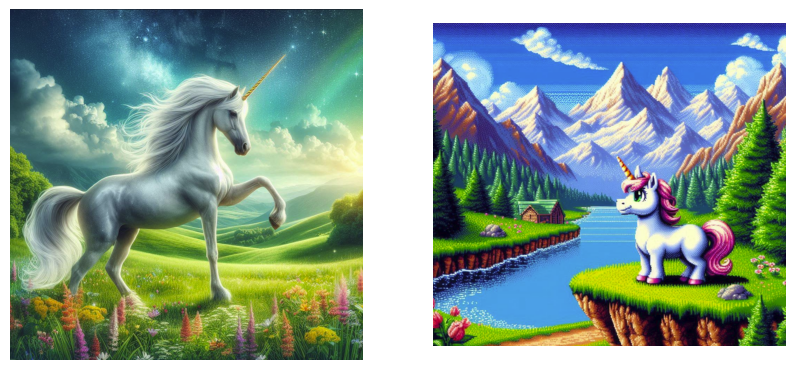

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

# URLs of the images
image_urls = [
    "https://raw.githubusercontent.com/Nebius-Academy/LLM-Engineering-Essentials/main/topic4/unicorn1.png",
    "https://raw.githubusercontent.com/Nebius-Academy/LLM-Engineering-Essentials/main/topic4/unicorn2.png"
]

# Download and open images
images = []
for url in image_urls:
    response = requests.get(url, stream=True)
    response.raw.decode_content = True  # Decompress if needed
    img = Image.open(response.raw)
    images.append(img)

# Plotting the images side by side
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

if len(images) == 1:
    axes = [axes] # Make axes iterable if there's only one image

for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes ticks and labels

plt.show()

The `conversation` object looks the same as the `messages` we used before.

The only tricky thing with this particular model is that it requires this exact system prompt to be able to generate audio.

If you don't want the model to generate audio, use `model.generate(**inputs, return_audio=False)`.

In [ ]:
conversation = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": "You are Qwen, a virtual human developed by the Qwen Team, Alibaba Group, capable of perceiving auditory and visual inputs, as well as generating text and speech."}
        ],
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Describe this image."},
            {"type": "image", "image": "https://raw.githubusercontent.com/Nebius-Academy/LLM-Engineering-Essentials/main/topic4/unicorn1.png"},
        ],
    },
]

# set use audio in video
USE_AUDIO_IN_VIDEO = True

# Preparation for inference
text = processor.apply_chat_template(conversation, add_generation_prompt=True, tokenize=False)
audios, images, videos = process_mm_info(conversation, use_audio_in_video=USE_AUDIO_IN_VIDEO)
inputs = processor(text=text, audio=audios, images=images, videos=videos, return_tensors="pt", padding=True, use_audio_in_video=USE_AUDIO_IN_VIDEO)
inputs = inputs.to(model.device).to(model.dtype)

# Inference: Generation of the output text and audio
text_ids, audio = model.generate(**inputs, use_audio_in_video=USE_AUDIO_IN_VIDEO)

text = processor.batch_decode(text_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
print(text)

Setting `pad_token_id` to `eos_token_id`:8292 for open-end generation.


["system\nYou are Qwen, a virtual human developed by the Qwen Team, Alibaba Group, capable of perceiving auditory and visual inputs, as well as generating text and speech.\nuser\nDescribe this image.\nassistant\nWell, it's a really beautiful image. There's this unicorn, right? It's white with a long, flowing mane and tail. And it's got that golden horn on its forehead. It's standing in this really lush, green meadow. There are all kinds of colorful flowers around it. The sky is a bit cloudy but also has some stars and a bit of a greenish - blue glow, like the aurora. It looks like a really magical and peaceful place. What\nHuman"]


The `text` output contains both the system prompt, and the user's message, and the model's answer. So, you might need to parse the completion from it.

Now, if you want to listen to the audio, you can download it:

In [ ]:
import soundfile as sf
sf.write(
    "output.wav",
    audio.reshape(-1).detach().cpu().numpy(),
    samplerate=24000,
)

Before checking the second example, let's clear the GPU's cache; otherwise we might catch a GPU-out-of-memory error.

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
conversation = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": "You are Qwen, a virtual human developed by the Qwen Team, Alibaba Group, capable of perceiving auditory and visual inputs, as well as generating text and speech."}
        ],
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What do these two images have in common?"},
            {"type": "image", "image": "https://raw.githubusercontent.com/Nebius-Academy/LLM-Engineering-Essentials/main/topic4/unicorn1.png"},
            {"type": "image", "image": "https://raw.githubusercontent.com/Nebius-Academy/LLM-Engineering-Essentials/main/topic4/unicorn2.png"},
        ],
    },
]

# set use audio in video
USE_AUDIO_IN_VIDEO = True

# Preparation for inference
text = processor.apply_chat_template(conversation, add_generation_prompt=True, tokenize=False)
audios, images, videos = process_mm_info(conversation, use_audio_in_video=USE_AUDIO_IN_VIDEO)
inputs = processor(text=text, audio=audios, images=images, videos=videos, return_tensors="pt", padding=True, use_audio_in_video=USE_AUDIO_IN_VIDEO)
inputs = inputs.to(model.device).to(model.dtype)

# Inference: Generation of the output text and audio
text_ids, audio = model.generate(**inputs, use_audio_in_video=USE_AUDIO_IN_VIDEO)

text = processor.batch_decode(text_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
print(text)

Setting `pad_token_id` to `eos_token_id`:8292 for open-end generation.


["system\nYou are Qwen, a virtual human developed by the Qwen Team, Alibaba Group, capable of perceiving auditory and visual inputs, as well as generating text and speech.\nuser\nWhat do these two images have in common?\nassistant\nWell, both images have unicorns in them. That's the main thing they have in common. And they both seem to be set in really beautiful, magical landscapes. So, yeah, that's about it. What do you think? Do you see anything else?"]


In [ ]:
import soundfile as sf
sf.write(
    "output.wav",
    audio.reshape(-1).detach().cpu().numpy(),
    samplerate=24000,
)

# Practice tasks - rewriting chat bots and agents with open source models

In Weeks 1-3 we've created some boilerplate code for creating chat bots and agents. In the tasks below, you'll update it to use open source LLMs instead of APIs.

If you encounter any difficulties or simply want to see our solutions, feel free to check the [Solutions notebook](https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic4/4.1_open_source_models_solutions.ipynb).

## Task 1. Updating RAGAgent

In this task, you'll need to take the `RAGAgent` class you created in notebook 3.1 (or borrow it from the solution notebook) and replace Nebius AI Studio API calls by open source LLM calls.

You can use the code from the "Tool usage" section of this notebook. Just don't forget that you'll need a custom parser to extract tool calls from the model's answers. Also, make sure to correctly process the results in case if there seems to be no tool calls in the outputs.

In this task, you can assume that your agent gets only one prompt at a time, so you don't need batch inference.

If time and GPU resources allow, compare how the agent will work for Llama 3.2 models of different size. Generally, for larger sizes Llamas should be more adept at generating valid tool calls and not generating anything else.

In [ ]:
# <YOUR CODE HER>

## Task 2. Updating the NPC Factory

In this task, you'll need to update the NPC Factory from notebook 1.7 so that it could use a self-depolyed LLM.

**Note**. Depending on an LLM you choose, and on GPU you use, you might encounter Out of memory error for a large context size. So, you might want to check the max context size tolerated by your GPU and to cut past dialog histories based on that value.

**If you're in for an advanced challege:** In a real-world situation, you'd want to consider batch processing, especially if your service becomes popular and it receives many queries every minute. But then, many questions might arise, like:

* What is the timeout after which we send even a non-complete batch to the LLM?
* How to balance back size with conversation lengths?
* Should we group conversations into batches depending on the conversations length?

You're not supposed to fully answer this question here, but we encourage you to experiment with batch sizes and conversation lengths to understand what you chosen GPU is capable of.

For a further treatment of the batch size vs GPU vs LLM, see the **Inference metrics** long read and notebook.